# Imports

In [1]:
# base
import numpy as np
import pkg_resources
from sklearn.impute import SimpleImputer
from pandas_plink import read_plink
import math
import yaml

# viz
import matplotlib.pyplot as plt
from matplotlib import gridspec
import cartopy.crs as ccrs

# feems
from feems.utils import prepare_graph_inputs
from feems import SpatialGraph, Viz
from feems.cross_validation import run_cv
from feems import Objective
from L1_pen_ver import L1Pen_SpatialGraph

# change matplotlib fonts
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.sans-serif"] = "Arial"

# Data

In [2]:
data_path = "/home/ubuntu/datasets/feems-datasets"

# read the genotype data and mean impute missing data
(bim, fam, G) = read_plink("{}/r1africa1nfb".format(data_path))
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
genotypes = imp.fit_transform((np.array(G)).T)

# setup graph
coord = np.loadtxt("{}/r1africa1nfb-run2.coord".format(data_path))  # sample coordinates
grid = np.loadtxt("{}/demes.txt".format(data_path)) 
edges = np.loadtxt("{}/edges.txt".format(data_path))
outer = np.loadtxt("{}/r1africa1nfb-run2.outer".format(data_path))

sp_graph = L1Pen_SpatialGraph(genotypes, coord, grid, edges, scale_snps=True)

Mapping files: 100%|██████████| 3/3 [00:00<00:00, 66.59it/s]


# Visualize

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


CPU times: user 15min 19s, sys: 8min 7s, total: 23min 27s
Wall time: 5min 55s


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


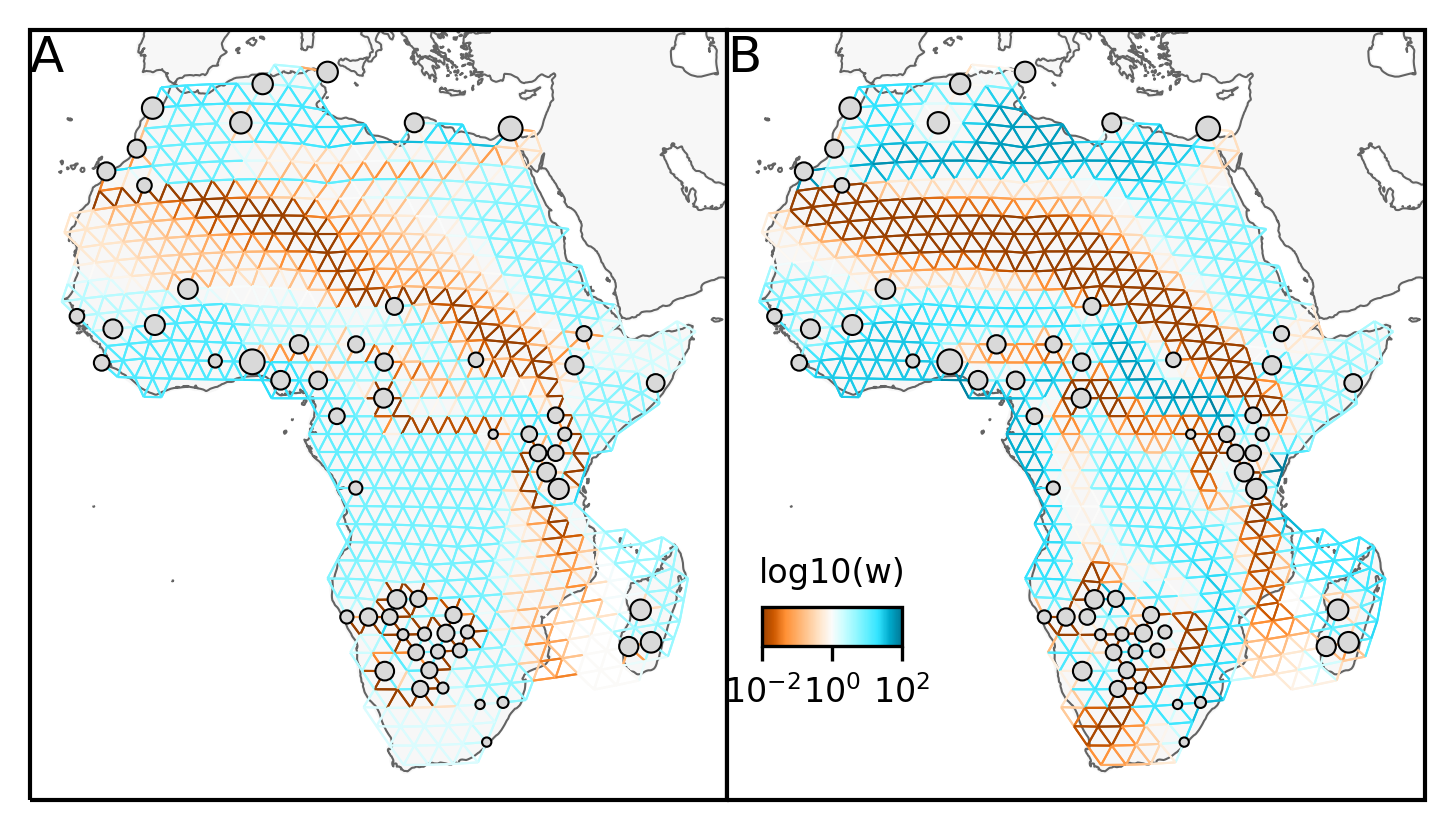

In [3]:
%%time
# figure params
projection = ccrs.Mercator()
title_loc = "left"
title_pad = "-10"
title_fontsize = 12
edge_width = .5
edge_alpha = 1
edge_zorder = 3
obs_node_size = 5
obs_node_linewidth = .4
cbar_font_size = 8
cbar_ticklabelsize = 8
cbar_orientation = "horizontal"

# figure setup
fig = plt.figure(dpi=300)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig, wspace=0.0, hspace=0.0)

# axis 00 
ax_00 = fig.add_subplot(spec[0, 0], projection=projection)
ax_00.set_title("A", loc=title_loc, pad=title_pad, fontdict={"fontsize": title_fontsize})
lamb = 0.05
alpha = 5.0
sp_graph.fit_admm(lamb=lamb, 
                  alpha=alpha, 
                  lb=1e-6,
                  ub=1e+6,
                  verbose=False)
v = Viz(ax_00, sp_graph, projection=projection, edge_width=edge_width, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=20, 
        obs_node_size=obs_node_size, sample_pt_color="black", 
        cbar_font_size=10)
v.draw_map()
v.draw_edges(use_weights=True)
v.draw_obs_nodes(use_ids=False) 
# ax_00.text(.2, .85, "lambda={:.5f}".format(lamb), 
#            fontdict={"fontsize": 4}, transform = ax_00.transAxes)

# axis 01
ax_01 = fig.add_subplot(spec[0, 1], projection=projection)
ax_01.set_title("B", loc=title_loc, pad=title_pad, fontdict={"fontsize": title_fontsize})
lamb = 0.05
alpha = 1.0
sp_graph.fit_admm_m(lamb=lamb, 
                    alpha=alpha, 
                    lb=1e-6,
                    ub=1e+6,
                    verbose=False)
v = Viz(ax_01, sp_graph, projection=projection, edge_width=edge_width, 
        edge_alpha=1, edge_zorder=100, sample_pt_size=20, 
        obs_node_size=obs_node_size, sample_pt_color="black", 
        cbar_font_size=10)
v.draw_map()
v.draw_edges(use_weights=True)
v.draw_obs_nodes(use_ids=False)
v.cbar_font_size = cbar_font_size
v.cbar_orientation = cbar_orientation
v.cbar_ticklabelsize = cbar_ticklabelsize
v.draw_edge_colorbar()
# ax_01.text(.2, .85, "lambda={:.5f}".format(lamb), 
#            fontdict={"fontsize": 4}, transform = ax_01.transAxes)